# Prepare the input data objects


```micromamba activate gena-env```

In [1]:
import numpy as np
import pandas as pd
import multianndata as mad
import cna
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
# constants
outdir = (
    "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl"
)

# filter just NK cells for the practice run, these had 3 significant loci identified in the GeNA paper 
celltype = (
    "NK" 
)

1. prepare the required inputs:
    * cell metadata with donor info for each cell 
    * cell by gene counts matrix 
    * donor-level metadata storing covariate information to be used in the GWAS, as well as batches

In [4]:
# read in the latest tenk cohort
adata = sc.read(
    "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/scanpy/output/integrated_objects/240_libraries/240_libraries_concatenated_harmony_leiden_filtered_reanalysed.h5ad",
    cache=True
)
# NOTE: reading in backed mode is 100x faster although I can't modify the object, also uses way less memory 
#           although it makes some things much slower or impossible 
# NOTE: can also try out "caching" the h5ad for faster read times as well??

In [5]:
## Currently we have only TOB genotypes available on brenner
# filter for just TOB to do a practice run, get just NK cells 
adata = adata[(adata.obs["cohort"] == "TOB") & (adata.obs["wg2_scpred_prediction"] == celltype)]
### ^^ Remove this when I want to do analysis for Bioheart
adata

View of AnnData object with n_obs × n_vars = 417851 × 3770
    obs: 'cellbender_background_fraction', 'cellbender_cell_probability', 'cellbender_cell_size', 'cellbender_droplet_efficiency', 'celltypist_predicted_labels', 'celltypist_over_clustering', 'celltypist_majority_voting', 'celltypist_conf_score', 'wg2_sample', 'wg2_nCount_RNA', 'wg2_nFeature_RNA', 'wg2_percent_mt', 'wg2_azimuth_predicted_celltype_l2', 'wg2_azimuth_predicted_celltype_l2_score', 'wg2_scpred_prediction', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'scds_score', 'scds_DropletType', 'MajoritySinglet_DropletType', 'MajoritySinglet_Individual_Assignment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'original_barcode', 'new_cell_name', 'sequencing_library', 'individual', 'cohort', 'onek1k_id', 'cpg_id_old', 'tob_id', 'cpg_id', 'onek1k_donor', 'ct_id'

In [6]:
with pd.option_context('display.max_columns', None):
    display(adata.obs.head(3))

,cellbender_background_fraction,cellbender_cell_probability,cellbender_cell_size,cellbender_droplet_efficiency,celltypist_predicted_labels,celltypist_over_clustering,celltypist_majority_voting,celltypist_conf_score,wg2_sample,wg2_nCount_RNA,wg2_nFeature_RNA,wg2_percent_mt,wg2_azimuth_predicted_celltype_l2,wg2_azimuth_predicted_celltype_l2_score,wg2_scpred_prediction,Vireo_Individual_Assignment,Vireo_DropletType,scDblFinder_DropletType,scDblFinder_Score,scds_score,scds_DropletType,MajoritySinglet_DropletType,MajoritySinglet_Individual_Assignment,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,original_barcode,new_cell_name,sequencing_library,individual,cohort,onek1k_id,cpg_id_old,tob_id,cpg_id,onek1k_donor,ct_id,batch,leiden
AAACCCACACCCAATA_S0012b,0.017512,0.999956,7487.498047,0.955251,CD16+ NK cells,25,CD16+ NK cells,0.999948,S0012b,6567.0,2618.0,4.888077,NK,1.0,NK,523,singlet,singlet,0.010283,0.083060,singlet,singlet,523,2618,2618,6567.0,321.0,4.888077,540.0,8.222933,2.0,0.030455,AAACCCACACCCAATA-1,AAACCCACACCCAATA_S0012b,S0012b,CPG313635,TOB,522_523,CPG5751,TOB1378,CPG313635,523,NaN,0,0
AAACCCACATAGAATG_S0012b,0.019326,0.999932,8851.587891,0.877832,CD16+ NK cells,16,CD16+ NK cells,0.999971,S0012b,7244.0,2582.0,7.979017,NK,1.0,NK,521,singlet,singlet,0.275929,0.288795,singlet,singlet,521,2582,2582,7244.0,578.0,7.979017,1129.0,15.585312,0.0,0.000000,AAACCCACATAGAATG-1,AAACCCACATAGAATG_S0012b,S0012b,CPG313619,TOB,520_521,CPG5736,TOB1376,CPG313619,521,NaN,0,0
AAACCCACATCGCTCT_S0012b,0.017234,0.999942,7653.547363,0.972606,CD16+ NK cells,24,CD16+ NK cells,0.743822,S0012b,6847.0,2820.0,3.096247,NK,1.0,NK,478,singlet,singlet,0.000006,0.143495,singlet,singlet,478,2820,2820,6847.0,212.0,3.096246,673.0,9.829123,0.0,0.000000,AAACCCACATCGCTCT-1,AAACCCACATCGCTCT_S0012b,S0012b,CPG313205,TOB,477_478,CPG5306,TOB1313,CPG313205,478,NaN,0,0


In [7]:
cell_meta = adata.obs[["onek1k_id", "sequencing_library"]].set_index(adata.obs.index).rename(columns={"onek1k_id": "id"})
cell_meta.to_csv(f"{outdir}/data/cell_meta.csv")
display(cell_meta.head(3))

,id,sequencing_library
AAACCCACACCCAATA_S0012b,522_523,S0012b
AAACCCACATAGAATG_S0012b,520_521,S0012b
AAACCCACATCGCTCT_S0012b,477_478,S0012b


In [8]:
# get seq library to cpg id mapping - use this to remove batchy neighbourhoods later on
# I recode the sequencing library to numeric categories so it can go in samplem
# TODO: still need to figure out how to handle the fact that each sample is in multiple "batches"

sequencing_library_mapping = adata.obs[
    ["onek1k_id", "sequencing_library"]
].drop_duplicates()
sequencing_library_mapping = sequencing_library_mapping.set_index(
    "onek1k_id", drop=True
)
sequencing_library_mapping["batch"] = sequencing_library_mapping[
    "sequencing_library"
].factorize()[0]
display(sequencing_library_mapping.head(3))
batch_mapping = sequencing_library_mapping.drop("sequencing_library", axis=1)
display(batch_mapping)
sequencing_library_mapping.to_csv(f"{outdir}/data/sequencing_library_mapping.csv")

,sequencing_library,batch
onek1k_id,,
522_523,S0012b,0
520_521,S0012b,0
477_478,S0012b,0


,batch
onek1k_id,
522_523,0
520_521,0
477_478,0
140_140,0
384_385,0
...,...
1057_1058,119
485_486,119
752_753,119


 NOTE:
 * Figure out how to add "batch" to samplem and remove batchy neighbourhoods when running cna 
 * currently this is not possible / can't figure out how to do it when I have a many:many mapping between batches and samples (onek1k id's)?
 * this just makes the samplem have multiple rows per sample which feels wrong 
 * can maybe find an answer to this in 
 

In [9]:
with pd.option_context("display.max_rows", None):
    display(sequencing_library_mapping.sort_index().head(100))

,sequencing_library,batch
onek1k_id,,
1_1,S0025_28b,59
1_1,S0025_28a,52
1_1,S0026c,56
1_1,S0026a,61
1_1,S0026b,48
2_2,S0026b,48
2_2,S0026a,61
2_2,S0025_28a,52
2_2,S0025_28b,59


In [10]:
# get the counts matrix
cells_x_genes = adata.to_df()
# export counts to csv
display(cells_x_genes.head(3))
# cells_x_genes.to_csv(f"{outdir}/data/cells_x_genes.csv")

,ENSG00000187961,ENSG00000187583,ENSG00000188290,ENSG00000131591,ENSG00000186891,ENSG00000186827,ENSG00000162572,ENSG00000149527,ENSG00000162591,ENSG00000238260,...,ENSG00000183878,ENSG00000290853,ENSG00000165246,ENSG00000176728,ENSG00000291031,ENSG00000291033,ENSG00000229236,ENSG00000198692,ENSG00000289707,ENSG00000228253
AAACCCACACCCAATA_S0012b,-0.102040,-0.068046,-0.066698,-0.259580,-0.236184,-0.242705,-0.069328,-0.163677,-0.208588,-0.074758,...,-0.771864,-0.191479,-0.149183,-0.218813,-0.185152,-0.492751,-0.183333,-0.354823,-0.231520,-0.131002
AAACCCACATAGAATG_S0012b,-0.106498,-0.081888,-0.171541,-0.280941,-0.202785,-0.214390,-0.071872,6.076639,-0.198082,-0.072260,...,1.331817,-0.239691,-0.156796,4.627407,-0.177409,1.722343,-0.200256,-0.336717,-0.191363,0.454989
AAACCCACATCGCTCT_S0012b,-0.099436,-0.061939,-0.035989,-0.255585,-0.248828,-0.257958,-0.068233,5.852769,-0.213469,-0.075236,...,-0.754385,-0.177775,-0.144994,-0.215450,-0.188029,-0.496211,-0.180526,-0.376941,-0.253605,0.811016


In [11]:
sample_meta = pd.read_csv(
    "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/saige_qtl_input_files_covariates_sex_age_geno_pcs_tob_bioheart.csv"
)
sample_meta = sample_meta[sample_meta["sample_id"].isin(adata.obs["cpg_id"])]
# add in the onek1k id
cpg_onek1k_id_mapping = adata.obs[["onek1k_id", "cpg_id"]].drop_duplicates()
display(cpg_onek1k_id_mapping.head(3))
sample_meta = pd.merge(
    sample_meta,
    cpg_onek1k_id_mapping,
    how="left",
    left_on="sample_id",
    right_on="cpg_id",
)
sample_meta = sample_meta.set_index("onek1k_id", drop=True).drop(
    ["sample_id", "cpg_id"], axis=1
) # remove these columns as I don't think the multianndata supports string variables in samplem 
display(sample_meta.head(3))

,onek1k_id,cpg_id
AAACCCACACCCAATA_S0012b,522_523,CPG313635
AAACCCACATAGAATG_S0012b,520_521,CPG313619
AAACCCACATCGCTCT_S0012b,477_478,CPG313205


,sex,age,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,geno_PC9,geno_PC10,geno_PC11,geno_PC12,geno_PC13,geno_PC14,geno_PC15,geno_PC16
onek1k_id,,,,,,,,,,,,,,,,,,
276_277,2.0,65.0,0.031874,-0.000410,0.004952,-0.000557,0.001924,-0.022447,0.002643,-0.001893,0.008205,-0.004277,0.003711,-0.006016,0.011691,-0.009226,0.001659,0.007041
278_279,1.0,45.0,0.031191,0.004006,0.003113,-0.002887,0.003075,-0.024638,0.002322,0.002359,0.021236,-0.005583,0.004636,-0.006784,0.014104,-0.007854,-0.003376,0.004050
279_280,2.0,73.0,0.032146,0.001124,0.002034,-0.003210,-0.000880,-0.015663,0.003080,-0.001562,0.014510,-0.003109,0.004357,-0.001489,0.008275,-0.007595,-0.005692,0.002729


In [13]:
# display(sample_meta)
rows_with_missing = sample_meta[sample_meta.isna().any(axis=1)]
display(rows_with_missing)
# for missing sex, use 0
sample_meta["sex"] = sample_meta["sex"].fillna(0)

,sex,age,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,geno_PC9,geno_PC10,geno_PC11,geno_PC12,geno_PC13,geno_PC14,geno_PC15,geno_PC16
onek1k_id,,,,,,,,,,,,,,,,,,
276_277,2.0,65.0,0.031874,-0.000410,0.004952,-0.000557,0.001924,-0.022447,0.002643,-0.001893,0.008205,-0.004277,0.003711,-0.006016,0.011691,-0.009226,0.001659,0.007041
278_279,1.0,45.0,0.031191,0.004006,0.003113,-0.002887,0.003075,-0.024638,0.002322,0.002359,0.021236,-0.005583,0.004636,-0.006784,0.014104,-0.007854,-0.003376,0.004050
279_280,2.0,73.0,0.032146,0.001124,0.002034,-0.003210,-0.000880,-0.015663,0.003080,-0.001562,0.014510,-0.003109,0.004357,-0.001489,0.008275,-0.007595,-0.005692,0.002729
280_281,2.0,25.0,0.022925,-0.001849,0.008604,-0.003138,0.001227,-0.012471,-0.000189,-0.000706,0.019296,-0.005162,0.004675,-0.011633,0.001585,-0.012458,0.001691,0.002326
281_282,2.0,53.0,0.029691,0.004519,0.004947,-0.002352,0.002671,-0.021663,0.005412,-0.002743,0.019496,-0.011135,0.008282,-0.007981,0.013814,-0.013639,0.000209,0.009120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959_960,2.0,19.0,0.030631,0.003893,0.004568,-0.002958,0.001628,-0.020637,0.003194,-0.002507,0.025744,-0.007174,0.001096,-0.013423,0.013252,-0.015006,-0.001747,0.010526
960_961,2.0,73.0,0.029611,0.001636,0.002385,-0.001334,0.000352,-0.015766,0.002925,0.001546,0.023328,-0.002993,0.004423,-0.005617,0.009979,-0.014310,0.001826,0.009812
961_962,2.0,62.0,0.027068,0.004368,0.005220,-0.003066,0.002257,-0.016874,0.000897,-0.002162,0.018960,-0.006821,0.003939,-0.007990,0.009144,-0.013954,-0.006080,0.001970


,sex,age,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,geno_PC9,geno_PC10,geno_PC11,geno_PC12,geno_PC13,geno_PC14,geno_PC15,geno_PC16
onek1k_id,,,,,,,,,,,,,,,,,,


one sample has missing sex - replace NA with zero 

In [14]:
madata = mad.MultiAnnData(X=cells_x_genes, obs=cell_meta, sampleid="id")
# Add all covariate information to d.samplem
madata.samplem = madata.samplem.join(sample_meta)#.join(batch_mapping) # don't add in the batch mappings for now 
# check that you can actually save it with current metadata columns
madata.write(f"{outdir}/data/scDataObject.h5ad")

['id' 'sequencing_library']
consider casting to numeric types where appropriate, and
consider re-coding text-valued columns with pandas.get_dummies


Look at sample meta to see if we have individuals with missing metadata

 run `/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/cell_state_abundance_qtl/02_dim_reduction.py` to do the dim reduction + NAM PC calculations

# Data Vis

In [2]:
# read in the GeNA results
sumstats = pd.read_table(
    "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/output/GeNA/GeNA_sumstats.txt"
)

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


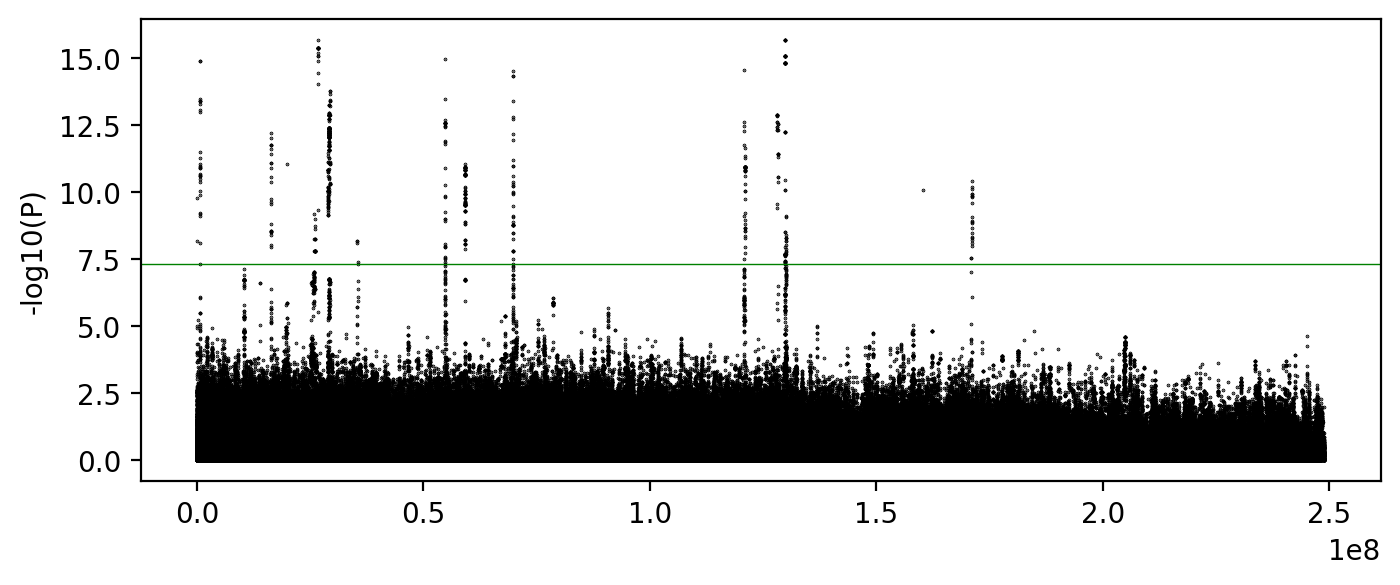

In [3]:
# visualize
fig = plt.figure(figsize=(8, 3), dpi=200)
plt.scatter(sumstats.POS.values, -np.log10(sumstats.P), s=0.1, c="black")
plt.ylabel("-log10(P)")
plt.axhline(y=-np.log10(5e-8), lw=0.5, c="green")
plt.show()

In [6]:
# get P values passing genome - wide significance
sumstats["neg_log10_P"] = -np.log10(sumstats.P)  # sumstats_sig = sumstats.loc[sumstats["P"] < 5e-8,]#sort_values(by="P")
sumstats_sig = sumstats.loc[sumstats["neg_log10_P"] > -np.log10(5e-8), :]

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
sumstats_sig.sort_values("neg_log10_P", ascending=False)

with pd.option_context("display.max_rows", None):
    display(sumstats_sig.sort_values("neg_log10_P", ascending=False).head(200))

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,P,k,...,BETA_NAMPC32,BETA_NAMPC33,BETA_NAMPC34,BETA_NAMPC35,BETA_NAMPC36,BETA_NAMPC37,BETA_NAMPC38,BETA_NAMPC39,BETA_NAMPC40,neg_log10_P
1973897,5,171074478,5:170501482,T,A,T,ADD,976,0.0,40,...,-0.000418,0.003743,-0.002908,0.001254,-0.000554,0.003891,-0.000817,-0.000385,-0.001320,inf
1973857,5,171053696,5:170480700,C,A,C,ADD,976,0.0,40,...,-0.000389,0.003778,-0.002926,0.001380,-0.000486,0.003900,-0.000981,-0.000393,-0.001461,inf
1973777,5,170990360,5:170417364,A,G,A,ADD,976,0.0,40,...,-0.000525,0.003550,-0.003119,0.001917,-0.000472,0.003935,-0.000642,-0.000446,-0.001167,inf
1973779,5,170994284,5:170421288,A,G,A,ADD,976,0.0,40,...,-0.000361,0.003847,-0.003033,0.001583,-0.000396,0.004039,-0.000781,-0.000453,-0.001245,inf
1973780,5,170995583,5:170422587,G,A,G,ADD,976,0.0,40,...,-0.002429,0.003547,-0.002950,0.002447,0.000685,0.003933,0.000083,0.000110,-0.000301,inf
1973781,5,170996530,5:170423534,C,T,C,ADD,976,0.0,40,...,-0.000488,0.003547,-0.003127,0.001962,-0.000385,0.004035,-0.000601,-0.000483,-0.001111,inf
1973782,5,170998056,5:170425060,C,G,C,ADD,976,0.0,40,...,-0.000361,0.003847,-0.003033,0.001583,-0.000396,0.004039,-0.000781,-0.000453,-0.001245,inf
1973783,5,170999163,5:170426167,G,C,G,ADD,976,0.0,40,...,-0.000361,0.003847,-0.003033,0.001583,-0.000396,0.004039,-0.000781,-0.000453,-0.001245,inf
1973784,5,171000227,5:170427231,C,T,C,ADD,976,0.0,40,...,-0.000398,0.003741,-0.003015,0.001737,-0.000365,0.004096,-0.000905,-0.000573,-0.001350,inf
1973785,5,171000503,5:170427507,G,A,G,ADD,976,0.0,40,...,-0.000361,0.003847,-0.003033,0.001583,-0.000396,0.004039,-0.000781,-0.000453,-0.001245,inf


In [11]:
sumstats_sig["#CHROM"].value_counts()

5     682
9     309
19    118
11     93
8      85
10     54
20     19
21     19
17      5
16      4
22      1
Name: #CHROM, dtype: int64

In [22]:
sumstats_sig.loc[
    (sumstats_sig["#CHROM"] == 11)
    & (sumstats_sig["POS"] > 128070000)
    & (sumstats_sig["POS"] < 128090000),
    :,
].iloc[:, 0:9]

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,P


In [13]:
sumstats_sig.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'A1', 'TEST', 'OBS_CT', 'P', 'k',
       'BETA_NAMPC1', 'BETA_NAMPC2', 'BETA_NAMPC3', 'BETA_NAMPC4',
       'BETA_NAMPC5', 'BETA_NAMPC6', 'BETA_NAMPC7', 'BETA_NAMPC8',
       'BETA_NAMPC9', 'BETA_NAMPC10', 'BETA_NAMPC11', 'BETA_NAMPC12',
       'BETA_NAMPC13', 'BETA_NAMPC14', 'BETA_NAMPC15', 'BETA_NAMPC16',
       'BETA_NAMPC17', 'BETA_NAMPC18', 'BETA_NAMPC19', 'BETA_NAMPC20',
       'BETA_NAMPC21', 'BETA_NAMPC22', 'BETA_NAMPC23', 'BETA_NAMPC24',
       'BETA_NAMPC25', 'BETA_NAMPC26', 'BETA_NAMPC27', 'BETA_NAMPC28',
       'BETA_NAMPC29', 'BETA_NAMPC30', 'BETA_NAMPC31', 'BETA_NAMPC32',
       'BETA_NAMPC33', 'BETA_NAMPC34', 'BETA_NAMPC35', 'BETA_NAMPC36',
       'BETA_NAMPC37', 'BETA_NAMPC38', 'BETA_NAMPC39', 'BETA_NAMPC40',
       'neg_log10_P'],
      dtype='object')

# Testing

In [15]:
mad_dimreduc = cna.read(f"{outdir}/data/scDataObject.dimreduc.h5ad")

In [16]:
mad_dimreduc

AnnData object with n_obs × n_vars = 417851 × 3770
    obs: 'id', 'sequencing_library'
    uns: 'NAM.T', 'NAM_nbhdXpc', 'NAM_resid.T', 'NAM_sampleXpc', 'NAM_svs', 'NAM_varexp', '_M', '_batches', '_covs', '_filter_samples', '_r', 'keptcells', 'neighbors', 'pca', 'sampleXmeta', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [17]:
mad_dimreduc.obsm['X_pca_harmony']

array([[ 4.311908  , -6.2227225 ,  0.24315453, ..., -1.849565  ,
        -0.49696255,  0.21049285],
       [-6.6643214 , -7.3665586 , -4.438113  , ...,  4.693012  ,
        -2.4872158 , -0.42183012],
       [-3.5426269 ,  1.0790684 , -7.593323  , ..., -2.0190415 ,
         0.15131922,  0.18462478],
       ...,
       [-5.9298844 ,  4.7133255 , -5.925976  , ..., -1.0995859 ,
         0.32820576,  0.1974595 ],
       [ 0.11857408, -4.0196404 , -3.4902616 , ..., -0.8320862 ,
         0.94677   , -1.0772034 ],
       [-5.141215  , -7.22242   , -1.1406778 , ..., -0.8088714 ,
        -3.0036209 , -1.8243988 ]], dtype=float32)

In [18]:
mad_dimreduc.X

array([[-0.10203974, -0.06804625, -0.06669761, ..., -0.35482275,
        -0.23151962, -0.13100232],
       [-0.10649776, -0.08188827, -0.17154105, ..., -0.33671656,
        -0.19136348,  0.45498902],
       [-0.09943619, -0.06193947, -0.03598856, ..., -0.37694108,
        -0.253605  ,  0.8110165 ],
       ...,
       [-0.09996848, -0.05998605,  0.00716083, ...,  3.3898664 ,
        -0.25130245,  0.14399257],
       [-0.09959501, -0.06187897, -0.03117724, ..., -0.37306347,
        -0.25255704,  0.44607502],
       [-0.11156055, -0.09158962, -0.19770186, ..., -0.2810141 ,
        -0.14991905,  0.16841678]], dtype=float32)

In [21]:
# sc.pl.umap(mad_dimreduc, color = "sequencing_library")

In [31]:
-np.log10(13e-325)

/tmp/ipykernel_64365/188384616.py:1: RuntimeWarning: divide by zero encountered in log10
  -np.log10(13e-325)


inf